<a href="https://colab.research.google.com/github/sanchit123manchanda/Covid-19-Project-Using-Deep-Learning/blob/master/Covid_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dataset : http://cb.lk/covid_19

!wget http://cb.lk/covid_19

--2020-09-19 12:01:31--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-09-19 12:01:32--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-09-19 12:01:33--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-09-19 12:01:33--  https://www.dropbox.com/s/raw/7rjw

In [2]:
!unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
replace CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdb

In [3]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [5]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape =(224,224,3) ))
model.add(Conv2D(64,(3,3),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy,optimizer='adam',metrics =['accuracy'])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [7]:
# Train from scratch

train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,

)

test_dataset = image.ImageDataGenerator(rescale = 1./255)


In [8]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [13]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 6,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2  
)

Epoch 1/10
6/6 [==============================] - 53s 9s/step - loss: 0.4431 - accuracy: 0.8125 - val_loss: 0.3610 - val_accuracy: 0.9167
Epoch 2/10
6/6 [==============================] - 52s 9s/step - loss: 0.4222 - accuracy: 0.8177 - val_loss: 0.2954 - val_accuracy: 0.9500
Epoch 3/10
6/6 [==============================] - 54s 9s/step - loss: 0.2984 - accuracy: 0.9062 - val_loss: 0.1816 - val_accuracy: 0.9667
Epoch 4/10
6/6 [==============================] - 52s 9s/step - loss: 0.2184 - accuracy: 0.9167 - val_loss: 0.1443 - val_accuracy: 0.9833
Epoch 5/10
6/6 [==============================] - 52s 9s/step - loss: 0.1909 - accuracy: 0.9323 - val_loss: 0.1065 - val_accuracy: 0.9667
Epoch 6/10
6/6 [==============================] - 51s 9s/step - loss: 0.2266 - accuracy: 0.9115 - val_loss: 0.1246 - val_accuracy: 0.9833
Epoch 7/10
6/6 [==============================] - 51s 9s/step - loss: 0.1466 - accuracy: 0.9688 - val_loss: 0.0864 - val_accuracy: 1.0000
Epoch 8/10
6/6 [==================

In [11]:
#Class Activation Maps

In [14]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.0815158411860466, 0.9776785969734192]

In [15]:
model.evaluate(validation_generator)

2/2 [==============================] - 2s 887ms/step - loss: 0.0616 - accuracy: 1.0000


[0.06164968013763428, 1.0]

In [16]:
y_actual = []
y_test = []

In [18]:
import os

In [19]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i,target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i,target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [22]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(y_actual,y_test)

In [25]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


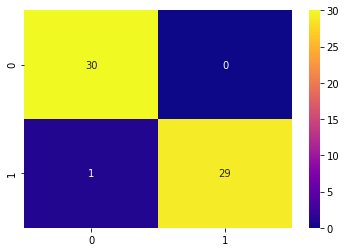

In [27]:
sns.heatmap(cm,cmap = 'plasma',annot = True)

In [28]:
cm

array([[30,  0],
       [ 1, 29]])